<a href="https://colab.research.google.com/github/scomentale/projects/blob/main/teamvi_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import re
import nltk
nltk.download('words')
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from string import punctuation

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/scomentale/projects/main/ep_raw.csv?token=GHSAT0AAAAAABPRIOUW4NEVQGTAM5DHPE7GYPMMJFA', sep = ';')

In [4]:
df.columns = ['id', 'text', 'date', 'country', 'speaker']
df['id'] = df['id'].str.lower()
df['speaker'] = df['speaker'].str.lower().str.split().str.get(-1)
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

In [5]:
stoplist_append = [
        "0o", "0s", "3a", "3b", "3d", "6b", "6o", "a", "a1", "a2", "a3", 
        "a4", "ab", "able", "about", "above", "abst", "ac", "accordance", 
        "according", "accordingly", "across", "act", "actually", "ad", "added",
        "adj", "ae", "af", "affected", "affecting", "affects", "after", 
        "afterwards", "ag", "again", "against", "ah", "aj", 
        "al", "ale", "all", "allow", "allows", "almost", "alone", "along", "already", 
        "also", "although", "always", "am", "among", "amongst", "amoungst", 
        "amount", "an", "and", "announce", "another", "any", "anybody", 
        "anyhow", "anymore", "anyone", "anything", "anyway", "anyways", "anywhere", 
        "ao", "ap", "apart", "apparently", "appear", "applause", "appreciate", "appropriate", 
        "approximately", "ar", "are", "arise", "around", 
        "as", "a's", "aside", "ask", "asking", "associated", "at", "au", "auth", "av", 
        "available", "aw", "away", "awfully", "ax", "ay", "az", "b", "b1", "b2", "b3", 
        "ba", "back", "bc", "bd", "be", "became", "because", "become", "becomes", "becoming", 
        "been", "before", "beforehand", "begin", "beginning", "beginnings", "begins", "behind", 
        "being", "believe", "below", "beside", "besides", "best", "better", "between", "beyond", 
        "bi", "bill", "biol", "bj", "bk", "bl", "bn", "both", "bottom", "bp", "br", "brief", "briefly", 
        "bs", "bt", "bu", "but", "bx", "by", "c", "c1", "c2", "c3", "ca", "call", "came", "can", 
        "cause", "causes", "cc", "cd", "ce", "certain", "certainly", "cf", "cg", "ch", 
        "changes", "ci", "cit", "cj", "cl", "clearly", "cm", "c'mon", "cn", "co", "com", "come", "comes", 
        "con", "concerning", "consequently", "consider", "considering", "contain", "containing", "contains", 
        "corresponding", "could", "course", "cp", "cq", "cr", "cry", 
        "cs", "c's", "ct", "cu", "currently", "cv", "cx", "cy", "cz", "d", "d2", "da", "date", "dc", 
        "dd", "de", "definitely", "describe", "described", "despite", "detail", "df", "di", "did", 
        "different", "dj", "dk", "dl", "do", "does", "doing",
        "don", "done", "down", "downwards", "dp", "dr", "ds", "dt", "du", "due", "during", 
        "dx", "dy", "e", "e2", "e3", "ea", "each", "ec", "ed", "edu", "ee", "ef", "effect", "eg", 
        "ei", "eight", "eighty", "either", "ej", "el", "eleven", "else", "elsewhere", "em", "empty", 
        "en", "end", "ending", "enough", "entirely", "eo", "ep", "eq", "er", "es", "especially", 
        "est", "et", "et-al", "etc", "eu", "ev", "even", "ever", "every", "everybody", "everyone", 
        "everything", "everywhere", "ex", "exactly", "example", "except", "ey", "f", "f2", "fa", 
        "far", "fc", "few", "ff", "fi", "fifteen", "fifth", "fify", "fill", "find", "fire", "first", 
        "five", "fix", "fj", "fl", "fn", "fo", "followed", "following", "follows", "for", "former", 
        "formerly", "forth", "forty", "found", "four", "fr", "from", "front", "fs", "ft", "fu", 
        "full", "further", "furthermore", "fy", "g", "ga", "gave", "ge", "get", "gets", "getting", 
        "gi", "give", "given", "gives", "giving", "gj", "gl", "go", "goes", "going", "gone", "got",
        "gotten", "gr", "greetings", "gs", "gy", "h", "h2", "h3", "had", "hadn", "hadn't", "happens", 
        "hardly", "has", "hasn", "hasnt", "hasn't", "have", "having", "he", "hed",
        "he'd", "he'll", "hello", "help", "hence", "her", "here", "hereafter", "hereby", "herein",
        "heres", "here's", "hereupon", "hers", "herself", "hes", "he's", "hh", "hi", "hid", "him", 
        "himself", "his", "hither", "hj", "ho", "home", "hopefully", "how", "howbeit", "however",
        "how's", "hr", "hs", "http", "hu", "hundred", "hy", "i", "i2", "i3", "i4", "i6", "i7", "i8", 
        "ia", "ib", "ibid", "ic", "id", "i'd", "ie", "if", "ig", "ignored", "ih", "ii", "ij", "il", 
        "i'll", "im", "i'm", "in", "inasmuch", "inc", "indeed", "index", "indicate", "indicated",
        "indicates", "inner", "insofar", "instead", "interest", "into", "invention", "inward",
        "io", "ip", "iq", "ir", "is", "isn", "isn't", "it", "itd", "it'd", "it'll", "its", 
        "it's", "itself", "iv", "i've", "ix", "iy", "iz", "j", "jj", "jr", "js", "jt", 
        "ju", "just", "k", "ke", "keep", "keeps", "kept", "kg", "kj", "km", "know", 
        "known", "knows", "ko", "l", "l2", "la", "largely", "last", "lately", "later",
        "latter", "latterly", "lb", "lc", "le", "least", "les", "less", "lest", "let", 
        "lets", "let's", "lf", "like", "liked", "likely", "line", "little", "lj", "ll",
        "ll", "ln", "lo", "look", "looking", "looks", "los", "lr", "ls", "lt", "ltd", 
        "m", "m2", "ma", "made", "mainly", "make", "makes", "many", "may", "maybe", 
        "me", "mean", "means", "meantime", "meanwhile", "merely", "mg", "might", "mightn",
        "mightn't", "mill", "million", "mine", "miss", "ml", "mn", "mo", "more", "moreover", 
        "most", "mostly", "move", "mr", "mrs", "ms", "mt", "mu", "much", "mug", "must",
        "mustn", "mustn't", "my", "myself", "n", "n2", "na", "name", "namely", "nay",
        "nc", "nd", "ne", "near", "nearly", "necessarily", "necessary", "need", "needn", 
        "needn't", "needs", "neither", "never", "nevertheless", "new", "next", "ng",
        "ni", "nine", "ninety", "nj", "nl", "nn", "non", "none", "nonetheless", "nor", 
        "normally", "nos", "not", "noted", "nothing", "novel", "now", "nowhere", "nr", "ns",
        "nt", "ny", "o", "oa", "ob", "obtain", "obtained", "obviously", "oc", "od", 
        "of", "off", "often", "og", "oh", "oi", "oj", "ok", "okay", "ol", "old", "om",
        "omitted", "on", "once", "one", "ones", "only", "onto", "oo", "op", "oq", "or",
        "ord", "os", "ot", "other", "others", "otherwise", "ou", "ought", "our", "ours",
        "ourselves", "out", "outside", "over", "overall", "ow", "owing", "own", "ox", 
        "oz", "p", "p1", "p2", "p3", "page", "pagecount", "pages", "par", "part", 
        "particular", "particularly", "pas", "past", "pc", "pd", "pe", "per", "perhaps",
        "pf", "ph", "pi", "pj", "pk", "pl", "placed", "please", "plus", "pm", "pn",
        "po", "poorly", "possible", "possibly", "potentially", "pp", "pq", "pr", 
        "predominantly", "present", "presumably", "previously", "primarily", 
        "probably", "promptly", "proud", "provides", "ps", "pt", "pu", "put", 
        "py", "q", "qj", "qu", "que", "quickly", "quite", "qv", "r", "r2", "ra",
        "ran", "rather", "rc", "rd", "re", "readily", "really", "reasonably", 
        "recent", "recently", "ref", "refs", "regarding", "regardless", "regards",
        "related", "relatively", "research", "research-articl", "respectively",
        "resulted", "resulting", "results", "rf", "rh", "ri", "right", "rj", "rl", 
        "rm", "rn", "ro", "rq", "rr", "rs", "rt", "ru", "run", "rv", "ry", "s", "s2",
        "sa", "said", "same", "saw", "say", "saying", "says", "sc", "sd", "se", "sec",
        "second", "secondly", "section", "see", "seeing", "seem", "seemed", "seeming",
        "seems", "seen", "self", "selves", "sensible", "sent", "serious", "seriously", 
        "seven", "several", "sf", "shall", "shan", "shan't", "she", "shed", "she'd",
        "she'll", "shes", "she's", "should", "shouldn", "shouldn't", "should've", "show",
        "showed", "shown", "showns", "shows", "si", "side", "significant", "significantly", 
        "similar", "similarly", "since", "sincere", "six", "sixty", "sj", "sl", "slightly", 
        "sm", "sn", "so", "some", "somebody", "somehow", "someone", "somethan", "something",
        "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "sp", 
        "specifically", "specified", "specify", "specifying", "speech", "sq", "sr", "ss", "st", 
        "still", "stop", "strongly", "sub", "substantially", "successfully", "such", 
        "sufficiently", "suggest", "sup", "sure", "sy", "system", "sz", "t", "t1", "t2",
        "t3", "take", "taken", "taking", "tb", "tc", "td", "te", "tell", "ten", "tends", 
        "tf", "th", "than", "thank", "thanks", "thanx", "that", "that'll", "thats", 
        "that's", "that've", "the", "their", "theirs", "them", "themselves", "then",
        "thence", "there", "thereafter", "thereby", "thered", "therefore", "therein",
        "there'll", "thereof", "therere", "theres", "there's", "thereto", "thereupon",
        "there've", "these", "they", "theyd", "they'd", "they'll", "theyre", "they're", 
        "they've", "thickv", "thin", "think", "third", "this", "thorough", "thoroughly",
        "those", "thou", "though", "thoughh", "thousand", "three", "throug", "through", 
        "throughout", "thru", "thus", "ti", "til", "tip", "tj", "tl", "tm", "tn", "to",
        "together", "too", "took", "top", "toward", "towards", "tp", "tq", "tr", "tried", 
        "tries", "truly", "try", "trying", "ts", "t's", "tt", "tv", "twelve", "twenty", 
        "twice", "two", "tx", "u", "u201d", "ue", "ui", "uj", "uk", "um", "un", "under", 
        "unfortunately", "unless", "unlike", "unlikely", "until", "unto", "uo", "up",
        "upon", "ups", "ur", "us", "use", "used", "useful", "usefully", "usefulness", 
        "uses", "using", "usually", "ut", "v", "va", "value", "various", "vd", "ve", 
        "ve", "very", "via", "viz", "vj", "vo", "vol", "vols", "volumtype", "vq", "vs",
        "vt", "vu", "w", "wa", "want", "wants", "was", "wasn", "wasnt", "wasn't", "way",
        "we", "wed", "we'd", "welcome", "well", "we'll", "well-b", "went", "were", "we're",
        "weren", "werent", "weren't", "we've", "what", "whatever", "what'll", "whats", "what's",
        "when", "whence", "whenever", "when's", "where", "whereafter", "whereas", "whereby",
        "wherein", "wheres", "where's", "whereupon", "wherever", "whether", "which", "while",
        "whim", "whither", "who", "whod", "whoever", "whole", "who'll", "whom", "whomever",
        "whos", "who's", "whose", "why", "why's", "wi", "widely", "will", "willing", "wish", 
        "with", "within", "without", "wo", "won", "wonder", "words", "world",
        "would", "www", "x", "x1", "x2", "x3", "xf", "xi",
        "xj", "xk", "xl", "xn", "xo", "xs", "xt", "xv", "xx", "y", "y2", "yes", "yet", "yj",
        "yl", "you", "youd", "you'd", "you'll", "your", "youre", "you're", "yours", "yourself",
        "yourselves", "you've", "yr", "ys", "yt", "z", "zero", "zi", "zz", 'rebecca', 
        'victor','guy', 'behalf', 'group', 'president', 'madam', 'gentleman', 'council', 'daniel',
        'ladies', 'commission', 'congratulate', 'chairman', 'chairwoman', 'nicolas', 'martin',
        'gue', 'lady', 'colleague', 'request', 'debate', 'brian', 'joseph', 'commissioner', 'leith', 'thar', 'dear',
        'office', 'tusk', 'van', 'prime', 'yesterday', 'today', 'tomorrow', 'nigel', 'derek', 'ind', 
        'batten', 'godfrey', 'trevor', 'roland', 'graham', 'booth', 'bloom', 'clark',
        'gerard', 'william', 'earl', 'john', 'david', 'monica', 'jan', 'timothy', 'chancellor', 'kathy', 'herman',
        'guy', 'marine', 'pen'
    ]

In [6]:
wnl = WordNetLemmatizer()
translator = str.maketrans('','',punctuation) 
eng_vocab = set(w.lower() for w in nltk.corpus.words.words())
stoplist = stopwords.words('english')

for x in stoplist_append:
    stoplist.append(x)

def fix_snippet(txt):
    x = txt.encode("ascii", errors = "ignore").decode()
    x = re.sub('\W\w\W', ' ', x).lower()
    x = re.sub('\W\w\w\W', ' ', x)
    x = x.replace('&quot;', ' ').replace ('\n', ' ')
    x = x.translate(translator)
    x = ' '.join(x.split())
    return x
    
def normalize_text(doc):
    doc = doc.replace('\r', ' ').replace('\n', ' ')
    lower = doc.lower() # Lowercase
    nopunc = lower.translate(translator) # Remove punctuation
    words = nopunc.split() # Tokenize the text
    nostop = [w for w in words if w not in stoplist] # Remove stopwords
    engwords = [w for w in nostop if w in eng_vocab] # Filter for English words
    no_numbers = [w if not w.isdigit() else '#' for w in engwords] # Remove digits
    lemmatized = [wnl.lemmatize(w) for w in no_numbers] # Lemmatize each word

    return lemmatized

df['text_clean'] = df['text'].apply(fix_snippet).apply(normalize_text)

In [7]:
groups = pd.read_csv('https://raw.githubusercontent.com/scomentale/projects/main/ep_groups.csv', sep = ',', index_col = 0)
groups = groups.sort_values(by = 'speaker')

unempl = pd.read_excel('https://github.com/scomentale/projects/blob/main/unemployment.xls?raw=true', index_col = 0)
unempl.columns = [x for x in range(0, 36)]

migrant = pd.read_excel('https://github.com/scomentale/projects/blob/main/migrantinflux.xlsx?raw=true', index_col = 0)

In [8]:
groups.loc[(groups['eurosceptic'] == 'TRUE'), 'eurosceptic'] = True
groups.loc[(groups['eurosceptic'] == 'FALSE'), 'eurosceptic'] = False
groups.loc[(groups['eurosceptic'] == 'None'), 'eurosceptic'] = None

In [9]:
speakerConditions = [
    (df['speaker'] == 'bisky'),          
    (df['speaker'] == 'borrelli'),          
    (df['speaker'] == 'callanan'),          
    (df['speaker'] == 'cohn-bendit'),          
    (df['speaker'] == 'crowley'),          
    (df['speaker'] == 'daul'),          
    (df['speaker'] == 'farage'),          
    (df['speaker'] == 'frassoni'),          
    (df['speaker'] == 'graaff'),          
    (df['speaker'] == 'harms'),       
    (df['speaker'] == 'kamall'),          
    (df['speaker'] == 'kaminski'),          
    (df['speaker'] == 'lamberts'),          
    (df['speaker'] == 'pen'),          
    (df['speaker'] == 'muscardini'),          
    (df['speaker'] == 'pittella'),          
    (df['speaker'] == 'schulz'),          
    (df['speaker'] == 'sinnott'),          
    (df['speaker'] == 'speroni'),         
    (df['speaker'] == 'swoboda'),          
    (df['speaker'] == 'verhofstadt'),          
    (df['speaker'] == 'watson'),          
    (df['speaker'] == 'weber'),         
    (df['speaker'] == 'wurtz'),          
    (df['speaker'] == 'zahradil'),         
    (df['speaker'] == 'zimmer'),         
]

groupValues = groups.group.tolist()
df['group'] = np.select(speakerConditions, groupValues)

countryValues = groups.country.tolist()
df['country'] = np.select(speakerConditions, countryValues)

esValues = groups.eurosceptic.tolist()
df['eurosceptic'] = np.select(speakerConditions, esValues)


In [10]:
groupConditions = [
    (df['group'] == 'alde') & (df['year'] < 2009),
    (df['group'] == 'alde') & (df['year'] >= 2009) & (df['year'] < 2014),
    (df['group'] == 'alde') & (df['year'] >= 2014),
    (df['group'] == 'epp') & (df['year'] < 2009),
    (df['group'] == 'epp') & (df['year'] >= 2009) & (df['year'] < 2014),
    (df['group'] == 'epp') & (df['year'] >= 2014),
    (df['group'] == 'sd') & (df['year'] < 2009),
    (df['group'] == 'sd') & (df['year'] >= 2009) & (df['year'] < 2014),
    (df['group'] == 'sd') & (df['year'] >= 2014),
    (df['group'] == 'uen') & (df['year'] < 2009),
    (df['group'] == 'ecr') & (df['year'] >= 2009) & (df['year'] < 2014),
    (df['group'] == 'ecr') & (df['year'] >= 2014),
    (df['group'] == 'gue/ngl') & (df['year'] < 2009),
    (df['group'] == 'gue/ngl') & (df['year'] >= 2009) & (df['year'] < 2014),
    (df['group'] == 'gue/ngl') & (df['year'] >= 2014),
    (df['group'] == 'greens') & (df['year'] < 2009),
    (df['group'] == 'greens') & (df['year'] >= 2009) & (df['year'] < 2014),
    (df['group'] == 'greens') & (df['year'] >= 2014),
    (df['group'] == 'efdd') & (df['year'] < 2009),
    (df['group'] == 'efdd') & (df['year'] >= 2009) & (df['year'] < 2014),
    (df['group'] == 'efdd') & (df['year'] >= 2014)
]

elecValues = [12.7, 11.41, 8.92, 36.7, 36.0, 29.43, 27.7, 25.0, 25.43, 3.69, 7.34, 9.32, 5.1, 4.8, 6.92, 5.5, 7.47, 6.66, 0.0, 4.35, 6.6]
df['previous_elect'] = np.select(groupConditions, elecValues)

In [11]:
quarterConditions = [
    (df['month'] <= 3),
    (df['month'] <= 6),
    (df['month'] <= 9),
    (df['month'] <= 12)
]

quarterValues = ['Q1', 'Q2', 'Q3', 'Q4']
df['quarter'] = np.select(quarterConditions, quarterValues)
df['year_quarter'] = df['year'].astype(str) + df['quarter']

quarter_absConditions = [
    (df['year_quarter'] == '2007Q1'),
    (df['year_quarter'] == '2007Q2'),
    (df['year_quarter'] == '2007Q3'),
    (df['year_quarter'] == '2007Q4'),
    (df['year_quarter'] == '2008Q1'),
    (df['year_quarter'] == '2008Q2'),
    (df['year_quarter'] == '2008Q3'),
    (df['year_quarter'] == '2008Q4'),
    (df['year_quarter'] == '2009Q1'),
    (df['year_quarter'] == '2009Q2'),
    (df['year_quarter'] == '2009Q3'),
    (df['year_quarter'] == '2009Q4'),
    (df['year_quarter'] == '2010Q1'),
    (df['year_quarter'] == '2010Q2'),
    (df['year_quarter'] == '2010Q3'),
    (df['year_quarter'] == '2010Q4'),
    (df['year_quarter'] == '2011Q1'),
    (df['year_quarter'] == '2011Q2'),
    (df['year_quarter'] == '2011Q3'),
    (df['year_quarter'] == '2011Q4'),
    (df['year_quarter'] == '2012Q1'),
    (df['year_quarter'] == '2012Q2'),
    (df['year_quarter'] == '2012Q3'),
    (df['year_quarter'] == '2012Q4'),
    (df['year_quarter'] == '2013Q1'),
    (df['year_quarter'] == '2013Q2'),
    (df['year_quarter'] == '2013Q3'),
    (df['year_quarter'] == '2013Q4'),
    (df['year_quarter'] == '2014Q1'),
    (df['year_quarter'] == '2014Q2'),
    (df['year_quarter'] == '2014Q3'),
    (df['year_quarter'] == '2014Q4'),
    (df['year_quarter'] == '2015Q1'),
    (df['year_quarter'] == '2015Q2'),
    (df['year_quarter'] == '2015Q3'),
    (df['year_quarter'] == '2015Q4')
]

quarter_absValues = [x for x in range(0, 36)]
df['quarter_abs'] = np.select(quarter_absConditions, quarter_absValues)

In [12]:
positionConditions = [
        (df['group'] == 'sd'),    
        (df['group'] == 'ecr'),
        (df['group'] == 'greens'),
        (df['group'] == 'uen'),
        (df['group'] == 'epp'),
        (df['group'] == 'enf'),
        (df['group'] == 'efdd'),
        (df['group'] == 'indep'),
        (df['group'] == 'alde'),
        (df['group'] == 'gue/ngl'),
]

positionValues = ['centreleft', 'right', 'left', 'right', 'centreright', 'right', 'right', 'none', 'centre', 'left']
df['position'] = np.select(positionConditions, positionValues)

In [13]:
unemplist = []

for index, row in df.iterrows():
    unemplist.append(unempl.loc[row['country'], row['quarter_abs']])

df['unemployment'] = pd.Series(unemplist)

In [14]:
migrantlist = []

for index, row in df.iterrows():
    migrantlist.append(migrant.loc[row['country'], row['year']])

migrantlist = [x * 0.001 for x in migrantlist]
df['migrants'] = pd.Series(migrantlist)

**########## Sentiment analysis ##########**

In [15]:
!pip install transformers
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification
from torch import nn
from tqdm import tqdm

     |████████████████████████████████| 3.4 MB 4.2 MB/s 
     |████████████████████████████████| 67 kB 3.7 MB/s 
     |████████████████████████████████| 596 kB 38.3 MB/s 
     |████████████████████████████████| 895 kB 55.6 MB/s 
     |████████████████████████████████| 3.3 MB 38.6 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [16]:
tokenizer = AutoTokenizer.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")
model = AutoModelForSequenceClassification.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")

Downloading:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/953 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/851k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/638M [00:00<?, ?B/s]

In [17]:
def get_sentiment(col):
    texts = df[col].values
    res = []
    for line in tqdm(texts):
        text = tokenizer(line, return_tensors = "pt", padding = True, truncation = True, max_length = 512)
        pt_outputs = model(**text)
        pt_predictions = nn.functional.softmax(pt_outputs.logits, dim = -1)
        res.append(list(pt_predictions[0].cpu().detach().numpy()))
    return np.array(res)

In [18]:
### PLEASE EXECUTE THIS WELL IN ADVANCE, OR SKIP IT ALTOGETHER!
### Ready-made csv can be found at https://github.com/scomentale/projects/blob/main/sentiment.csv
arr = get_sentiment('text')
df = pd.DataFrame(arr)
df.columns = ['very_negative', 'negative', 'neutral', 'positive', 'very_positive']

  2%|▏         | 89/3593 [02:52<1:52:52,  1.93s/it]


KeyboardInterrupt: ignored

**########## Data visualization ##########**

In [19]:
import time
import math

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pRand = 5
plt.style.use('seaborn-whitegrid')
plt.style.use('seaborn-deep')

In [20]:
data = pd.read_csv('https://github.com/scomentale/projects/blob/main/sentiment.csv?raw=true')
data['total_negative'] = data.very_negative + data.negative
data['total_positive'] = data.very_positive + data.positive

In [21]:
data['eurosceptic'].fillna(False, inplace = True)
data = pd.get_dummies(data, columns=['eurosceptic', 'position'])

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3593 entries, 0 to 3592
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            3593 non-null   int64  
 1   id                    3593 non-null   object 
 2   date                  3593 non-null   object 
 3   speaker               3593 non-null   object 
 4   text                  3593 non-null   object 
 5   text_clean            3593 non-null   object 
 6   country               3593 non-null   object 
 7   group                 3593 non-null   object 
 8   year                  3593 non-null   int64  
 9   month                 3593 non-null   int64  
 10  quarter               3593 non-null   object 
 11  year_quarter          3593 non-null   object 
 12  quarter_abs           3593 non-null   int64  
 13  previous_elect        3593 non-null   float64
 14  unemployment          3593 non-null   float64
 15  migrants             

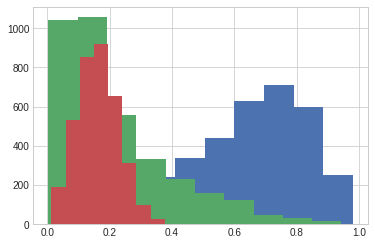

In [23]:
data['total_negative'].hist()
data['total_positive'].hist()
data['neutral'].hist()

In [24]:
years = sorted(data['year'].value_counts().index)

year_positive = {}
year_negative = {}
year_total_positive = {}
year_total_negative = {}
year_neutral = {}
year_migrants = {}

for year in years:
    year_data = data.loc[data['year']==year]
    year_positive[year] = year_data['very_positive'].mean()
    year_negative[year] = year_data['very_negative'].mean()    
    year_total_positive[year] = year_data['total_positive'].mean()    
    year_total_negative[year] = year_data['total_negative'].mean()   
    year_neutral[year] = year_data['neutral'].mean() 
    year_migrants[year] = year_data['migrants'].mean()

positives = [x for x in year_total_positive.values()]
negatives = [y for y in year_total_negative.values()]
neutrals = [z for z in year_neutral.values()]

year_migrants = {}
for year in years:
    year_data = data.loc[data['year'] == year]
    year_migrants[year] = year_data['migrants'].mean()

In [25]:
d = {'total_positive': year_total_positive, 'total_negative': year_total_negative, 'total_neutrals': year_neutral, 'migrants': year_migrants}
sent = pd.DataFrame(index = years, data = d)

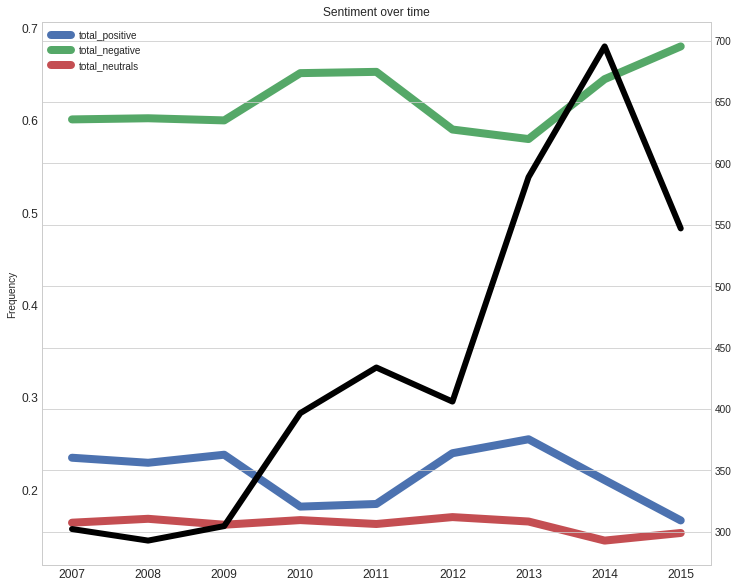

In [26]:
sent.iloc[:, :-1].plot(figsize = (12, 10), linewidth = 8, fontsize = 12, kind = 'line', title = 'Sentiment over time', ylabel = 'Frequency')
sent.iloc[:, -1].plot(secondary_y = True, linewidth = 6, color = 'black')

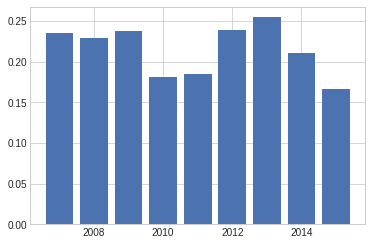

In [27]:
plt.bar(year_total_positive.keys(), year_total_positive.values())
plt.show()

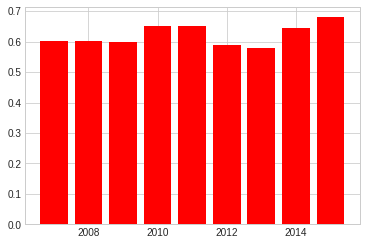

In [28]:
plt.bar(year_total_negative.keys(), year_total_negative.values(), color = 'red')
plt.show()

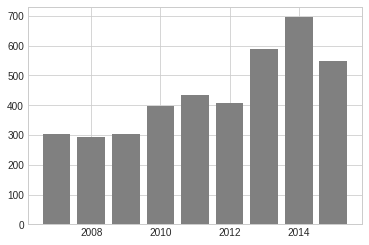

In [29]:
plt.bar(year_migrants.keys(), year_migrants.values(), color = 'grey')
plt.show()

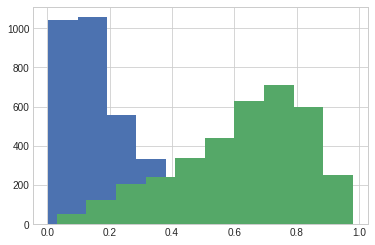

In [30]:
data['total_positive'].hist()
data['total_negative'].hist()

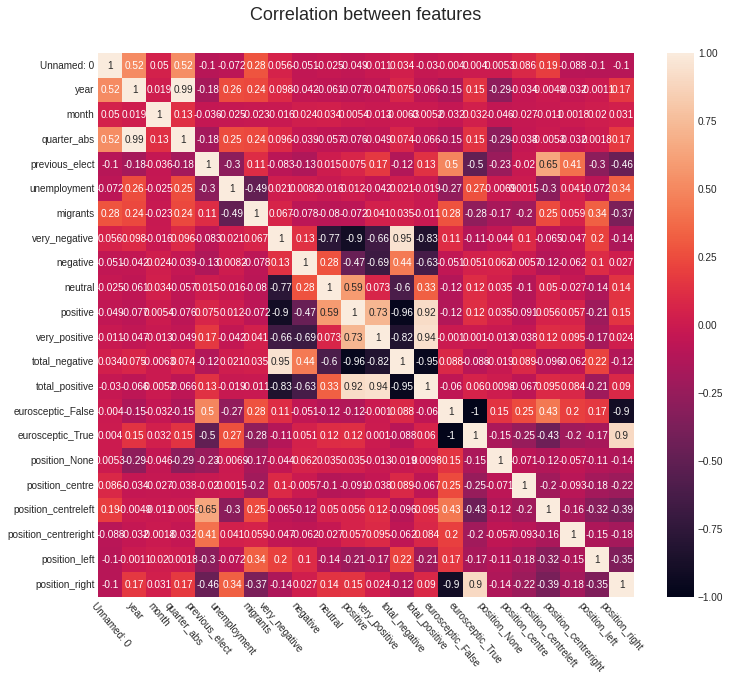

In [31]:
plt.figure(figsize=(12,10))
plt.title('Correlation between features', fontsize='18').set_position([.5, 1.05])
_ = sns.heatmap(data.corr(), annot=True)
_ = plt.xticks(rotation=-50)

**########## Regression Analysis ##########**

In [32]:
from scipy.cluster import hierarchy as hc

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn import linear_model
from sklearn import svm
from sklearn.svm import SVR
from sklearn import metrics
from sklearn import neighbors
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [33]:
data_x = data[['total_negative', 'year', 'migrants', 'unemployment', 'eurosceptic_False', 'eurosceptic_True', 'position_None', 'position_left', 'position_right', 'position_centreleft', 'position_centreright', 'position_centre']]
data_x = data_x.drop(['total_negative'], axis=1)
data_y = data['total_negative']
scaled_data_x = (data_x - data_x.mean()) / data_x.std()

In [34]:
x_train, x_test, y_train, y_test = train_test_split(scaled_data_x, data_y, test_size = 0.2, random_state = 42)

In [35]:
lg = LinearRegression()
lg.fit(x_train, y_train)

LinearRegression()

In [36]:
mean_squared_error(y_train, lg.predict(x_train))

0.03929460941637116

In [37]:
mean_squared_error(y_test, lg.predict(x_test))

0.04030814754427386

In [38]:
y_test[:10]

2833    0.513141
315     0.821044
3537    0.719345
3540    0.795183
439     0.275039
1454    0.598796
1725    0.433107
676     0.683492
3421    0.794831
3068    0.592563
Name: total_negative, dtype: float64

In [39]:
lg.predict(x_test)[:10]

array([0.74903374, 0.70423394, 0.70582085, 0.70582085, 0.5477398 ,
       0.56305962, 0.57099419, 0.74390679, 0.61860162, 0.61158257])

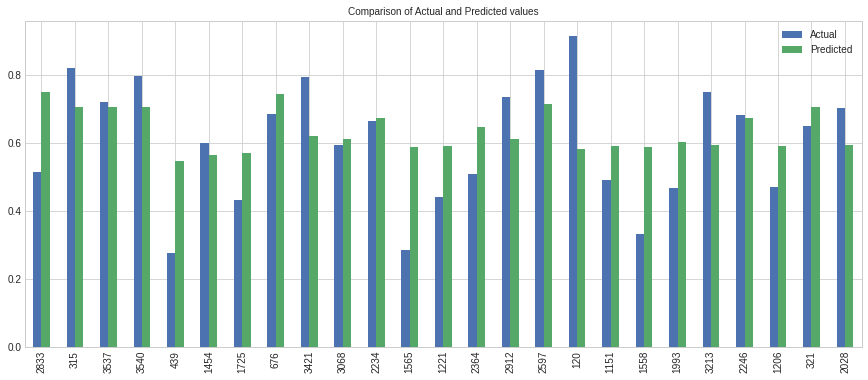

In [40]:
y_pred = lg.predict(x_test)

res = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})
df1 = res.head(25)
df1.plot(kind='bar',figsize=(15,6))
plt.title('Comparison of Actual and Predicted values', fontsize=10)
plt.show()

In [41]:
rf = RandomForestRegressor(max_depth = 3)
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=3)

In [42]:
mean_squared_error(y_train, rf.predict(x_train))

0.03579205435937387

In [43]:
mean_squared_error(y_test, rf.predict(x_test))

0.03867025407047809

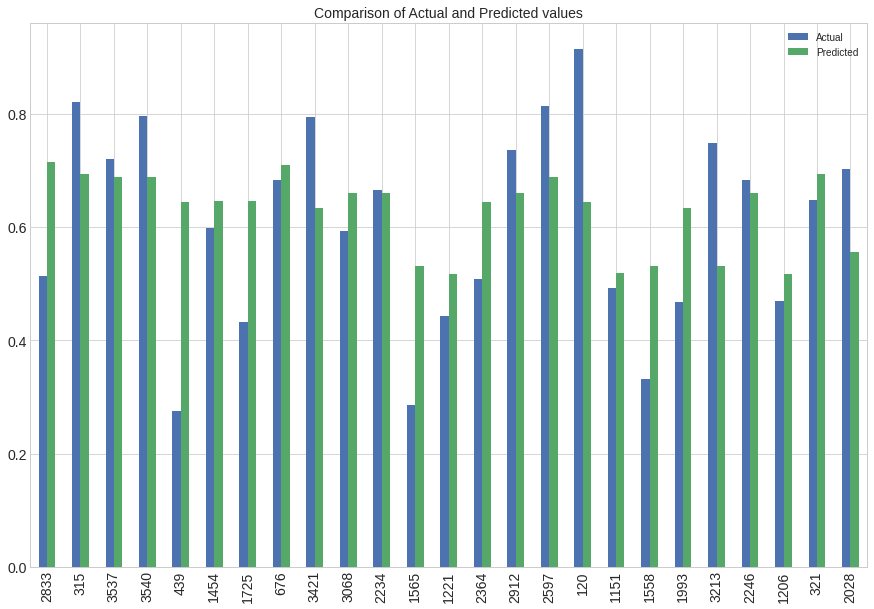

In [44]:
y_pred = rf.predict(x_test)

res = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})
df1 = res.head(25)
df1.plot(kind = 'bar',figsize = (15,10), fontsize = 14)
plt.title('Comparison of Actual and Predicted values', fontsize = 14)
plt.show()

In [45]:
column_names = data_x.columns
feature_importances = rf.feature_importances_
column_importance = dict(sorted(zip(column_names, feature_importances), key=lambda x: x[1]))

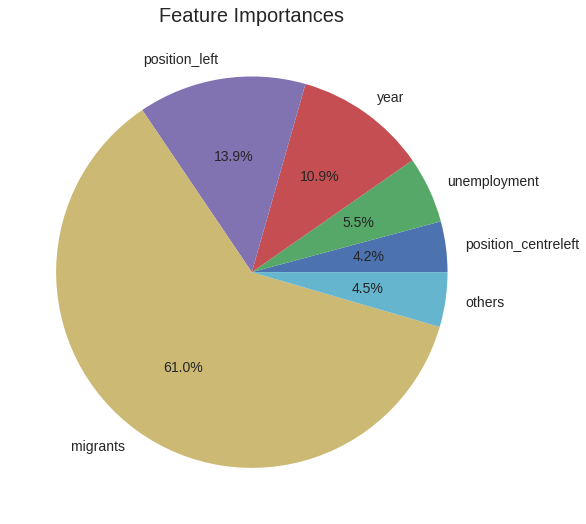

In [46]:
plt.figure(figsize=(12, 9))
plt.pie(list(column_importance.values())[-5:] + [sum(list(column_importance.values())[:-5])],
        labels=list(column_importance.keys())[-5:] + ["others"], autopct="%1.1f%%", textprops={"fontsize":14})
plt.title("Feature Importances", fontsize=20)
plt.show()